# Bent IC and Text Detection

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
from detector import Detector
import os
from DataAugmentator import get_boxes, read_boxes, overlay_good_pins
%matplotlib inline

Number of bent pins in file: 0


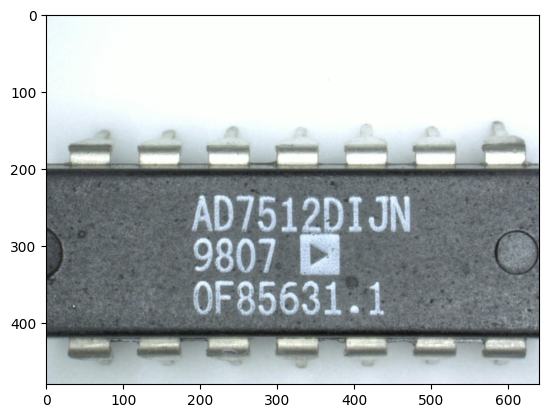


0: 608x800 15 okays, 1 package, 2 texts, 241.1ms
Speed: 2.5ms preprocess, 241.1ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 800)


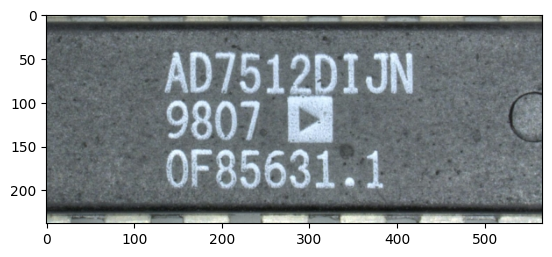

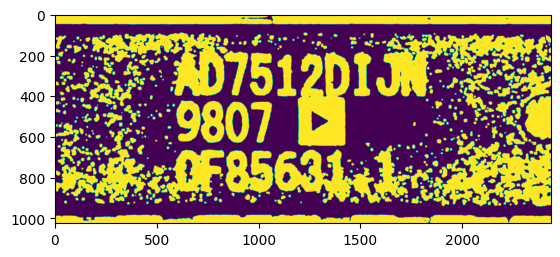

ValueError: Break point!!!

In [2]:
de = Detector()
#de.add_to_command_tree('-no-text', [])
de.add_to_command_tree('-show', [])
de.add_to_command_tree('-text-debug-mode', [True])
de.add_to_command_tree('-overlay-good-pin', ['c1'])
de.add_to_command_tree('-overlay-bent-pin', ['c0'])
de.add_to_command_tree('-overlay-package', ['c5'])
#de.add_to_command_tree('-model-n', [65])

input_image_folder  = './783-Pin-Detection/datasets/ic-dataset/images/val'
input_label_folder  ='./783-Pin-Detection/datasets/ic-dataset/labels/val'

image_files = [f for f in os.listdir(input_image_folder) if f.endswith(('.png', '.jpg'))]

for i, image_file in enumerate(image_files):
    image_path = os.path.join(input_image_folder, image_file)
    image = Image.open(image_path).convert('RGB')
    image_width, image_height = image.size

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(input_label_folder, label_file)
    boxes = get_boxes(read_boxes(label_path), cl=0)


    print(f'Number of bent pins in file: {len(boxes)}')
    compare_image = overlay_good_pins(image, boxes)
    plt.imshow(compare_image)
    plt.show()

    de.execute(image_path)
    break


Number of bent pins in file: 0


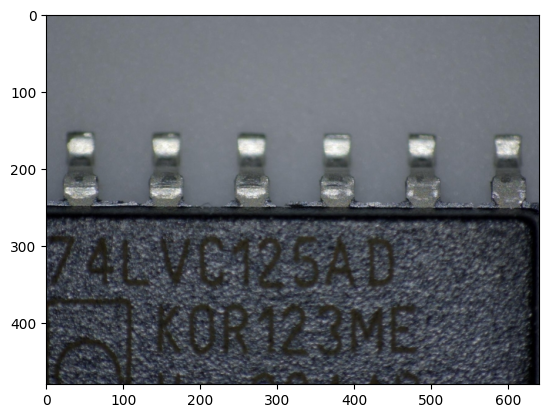


0: 608x800 6 okays, 1 package, 1 text, 230.1ms
Speed: 2.7ms preprocess, 230.1ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 800)


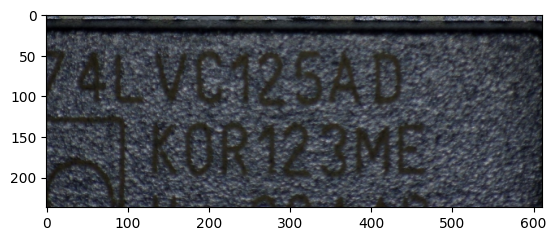

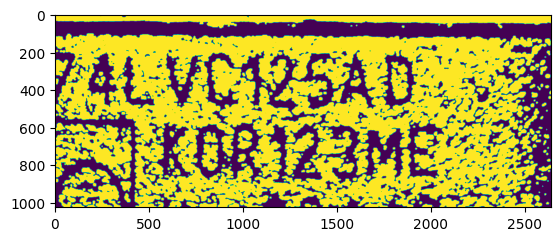

ValueError: Break point!!!

In [11]:
image_path = './783-Pin-Detection/datasets/ic-dataset/images/val/26.jpg'
image = Image.open(image_path).convert('RGB')
image_width, image_height = image.size

label_file = os.path.splitext(image_file)[0] + '.txt'
label_path = os.path.join(input_label_folder, label_file)
boxes = get_boxes(read_boxes(label_path), cl=0)

print(f'Number of bent pins in file: {len(boxes)}')
compare_image = overlay_good_pins(image, boxes)
plt.imshow(compare_image)
plt.show()

de.execute(image_path)